### Group 5 Members

1. Eunice Elikplim Doe
2. Rosemond Wenaweme Adiali
3. Constance Ahmed
4. Priscilla Naadu Lartey
5. Elizabeth Akossey

# FoodHub Data Analysis


### Problem Statement / Business Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Import the required libraries

In [37]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import your data

In [38]:
#read the data
foodhub_df = pd.read_csv('foodhub_order.csv')

### Do sanity checks on the data

In [39]:
#displays first five rows of dataset
head_df = foodhub_df.head()
print("First five rows:")
head_df

First five rows:


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [40]:
#displays last five rows of dataset
tail_df = foodhub_df.tail()
print("Last five rows:")
tail_df

Last five rows:


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [41]:
#shows a summary of the dataset
foodhub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [42]:
#shows the entries in each column
unique_entries = foodhub_df.nunique()
print("\nUnique entries:")
print("\n", unique_entries)


Unique entries:

 order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64


In [43]:
# Summary statistics
summary_stats = foodhub_df.describe()
print("\nSummary Statistics:")
print(summary_stats)


Summary Statistics:
           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


In [44]:
# Check for missing values
missing_values = foodhub_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [45]:
# Check data types
data_types = foodhub_df.dtypes
print("\nData Types:")
print(data_types)


Data Types:
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


In [46]:
# Check for duplicates
duplicate_rows = foodhub_df.duplicated().sum()
print("\nDuplicate Rows:")
print(duplicate_rows)


Duplicate Rows:
0


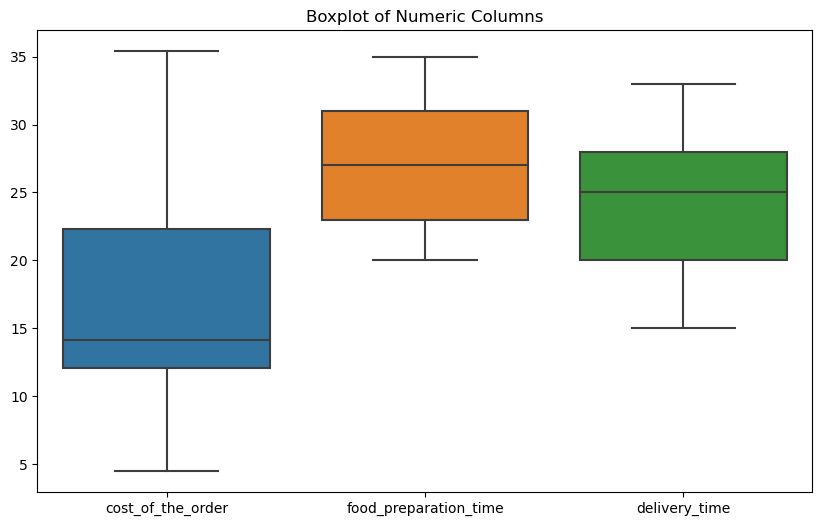

In [47]:
# Check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data = foodhub_df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']])
plt.title('Boxplot of Numeric Columns')
plt.show()

#### Obsevation:

From the plot above, we observe that there are no outliers in the data.


## Questions for guidance.
The questions or tasks below are meant to guide you to extract insight for the business. You are encourage to ask more questions.


### **Question 1:** How many orders are not rated?

In [48]:
# Checking the number of orders with rating as Not given
order_not_rated = foodhub_df[foodhub_df['rating'] == 'Not given']

#Counting the number of 'Not given'
orders_not_rated = order_not_rated['rating'].count()

print(f"The number of orders not rated is {orders_not_rated}")


The number of orders not rated is 736


## Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 2:** Explore all the variables and provide observations on their distributions. (Choose appropriate plots as you wish)

### Plotting the distributions for numerical variables (cost, preparation time, delivery time)

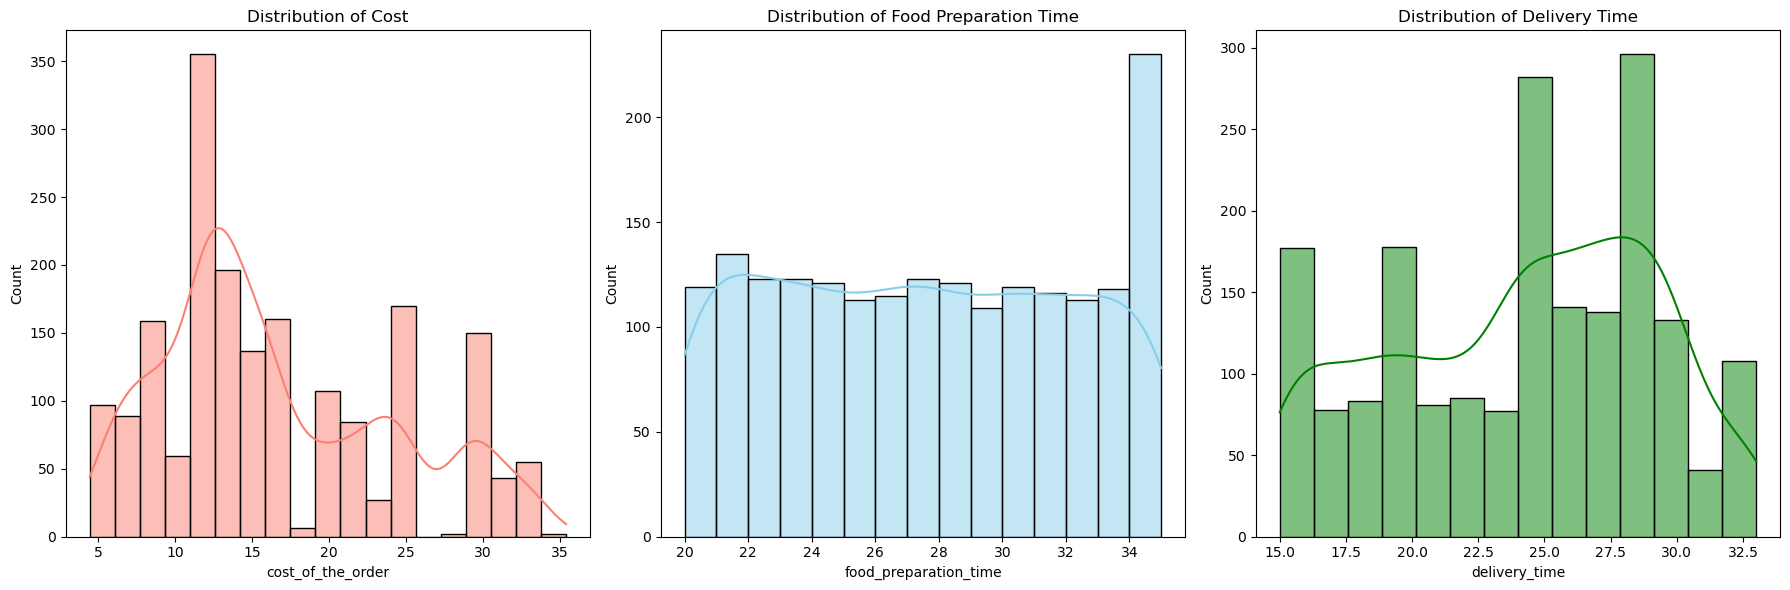

In [49]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))  # Adjusted to have only one row and three columns

# Numeric Variables
sns.histplot(foodhub_df['cost_of_the_order'], ax=axes[0], kde=True, color='salmon')
axes[0].set_title('Distribution of Cost')

sns.histplot(foodhub_df['food_preparation_time'], ax=axes[1], kde=True, color='skyblue', bins = 15)
axes[1].set_title('Distribution of Food Preparation Time')

sns.histplot(foodhub_df['delivery_time'], ax=axes[2], kde=True, color='green')
axes[2].set_title('Distribution of Delivery Time')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


Observations:

* Cost Distribution: Most orders seem to be between 10 and 15 dollars, with a right-skewed distribution.

* Food Preparation Time: The distribution of food preparation time appears to be between 34 to 36 minutes. The preparation time is roughly distributed between 20 to 34 minutes. 

* Delivery Time: Delivery time is indicating most orders are delivered between 25 to 30 minutes.


### Plotting the distributions for categorical variables (days of the week, cuisine type)

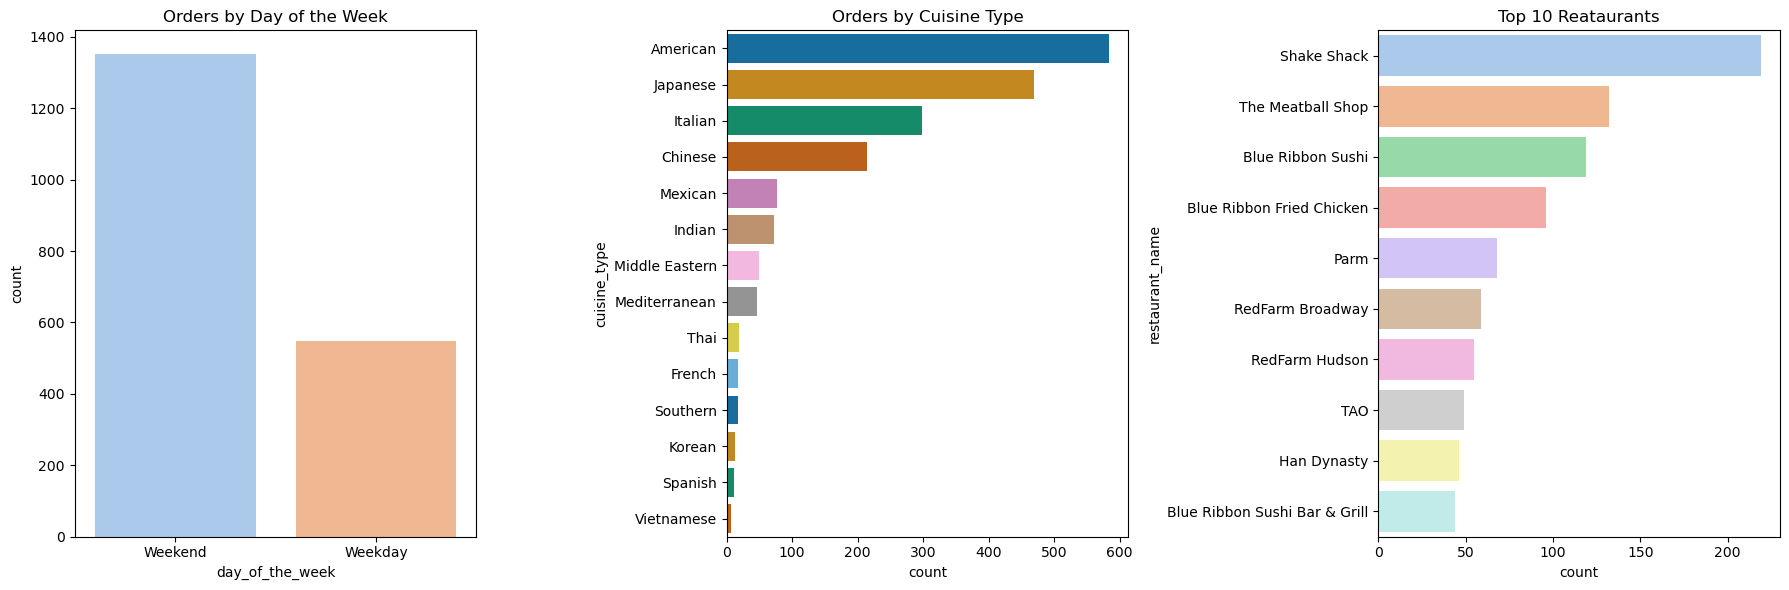

In [50]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Categorical Variables
sns.countplot(x='day_of_the_week', data=foodhub_df, ax=axes[0], palette='pastel')
axes[0].set_title('Orders by Day of the Week')



cuisine_counts = foodhub_df['cuisine_type'].value_counts()
sorted_cuisines = cuisine_counts.index
sns.countplot(y='cuisine_type', data=foodhub_df, order=sorted_cuisines, ax=axes[1], palette='colorblind')
axes[1].set_title('Orders by Cuisine Type')


sns.countplot(y='restaurant_name', data=foodhub_df, ax=axes[2], palette='pastel', 
              order = foodhub_df['restaurant_name'].value_counts().index[:10])
axes[2].set_title('Top 10 Reataurants')
plt.tight_layout()
plt.show()


#### Observation

* Day of the Week: There were more orders on weekends than weekdays.
* Cuisine Type: American cusine is the most ordered cuisine. Vietnamese is the least.
* Restaurants: Shack shack is the top restaurant, blue ribbon Sushi & grill have the least number of orders.

### Plotting the distributions for ratings

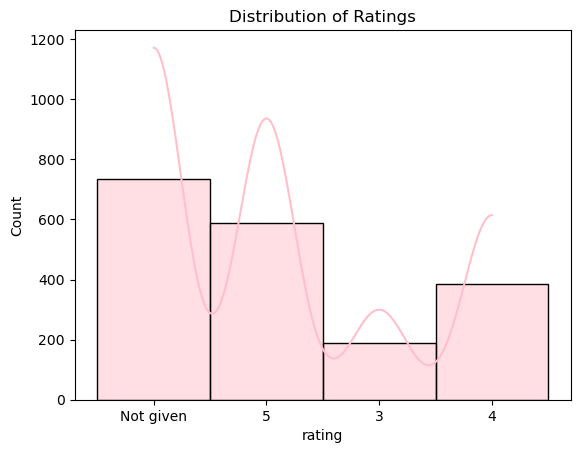

In [51]:
# Rating Distribution
sns.histplot(foodhub_df['rating'], kde=True, color='pink').set_title('Distribution of Ratings')

#plt.tight_layout()
plt.show()


#### Observation:

Rating Distribution: Most customers did not rate the restaurants. The maximum rating is concentrated at 5 and minimum rating is concentrated at 3.

### **Question 3**: Which are the top 5 restaurants in terms of the number of orders received?

In [52]:
# Count the number of orders received by each restaurant
top_restaurants = foodhub_df['restaurant_name'].value_counts().head(5)

print("Top 5 restaurants in terms of the number of orders received:")
top_restaurants

Top 5 restaurants in terms of the number of orders received:


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

### **Question 4**: Which is the most popular cuisine on weekends?

In [53]:
# Filter the dataset to include only orders placed on weekends
weekend_order = foodhub_df[foodhub_df['day_of_the_week'] == 'Weekend'].groupby('cuisine_type')

# Count the number of weekend orders
weekend_orders = weekend_order.count()

#Print cuisine type and corresponding order count
# for index, row in weekend_orders.iterrows():
#     print("Cuisine Type:", index)
#     print("Order Count:", row['order_id'])
#     print()  


most_popular_cuisine = weekend_orders.index[0]
print("The most popular cuisine on weekends is", most_popular_cuisine)  

The most popular cuisine on weekends is American


### **Question 5**: What percentage of the orders cost more than 20 dollars?

In [54]:
# Count the number of orders that cost more than 20 dollars
orders_over_20 = (foodhub_df['cost_of_the_order'] > 20).sum()

# Calculate the total number of orders
total_orders = len(foodhub_df)

# Calculate the percentage of orders that cost more than 20 dollars
percentage_over_20 = (orders_over_20 / total_orders) * 100

print(f"The percentage of orders that cost more than 20 dollars: {percentage_over_20:.4f}%")


The percentage of orders that cost more than 20 dollars: 29.2413%


### **Question 6**: What is the mean order delivery time?

In [55]:
# Calculate the mean order delivery time
mean_delivery_time = foodhub_df['delivery_time'].mean()

print(f"The mean order delivery time is: {mean_delivery_time:.4f} minutes")


The mean order delivery time is: 24.1617 minutes


### **Question 7:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [56]:
# Count the number of orders placed by each customer
customer_orders = foodhub_df['customer_id'].value_counts()

# Get the top 3 most frequent customers
top_customers = customer_orders.head(3)

print("Top 3 most frequent customers and the number of orders they placed:")
top_customers

Top 3 most frequent customers and the number of orders they placed:


customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

## Bivariate/Multivariate Analysis

### **Question 8**: Perform a bivariate/multivariate analysis to explore relationships between the important variables in the dataset.


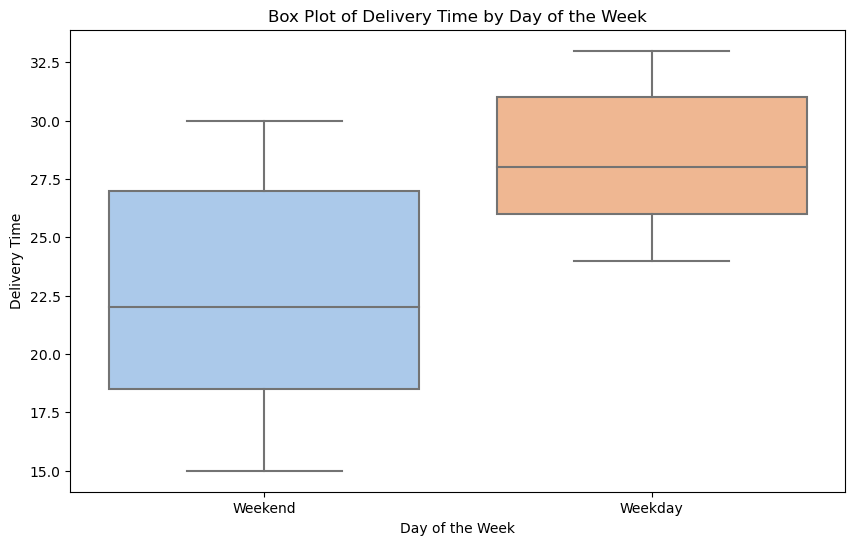

In [57]:
# Box plot of Delivery Time by Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=foodhub_df, palette='pastel')
plt.title('Box Plot of Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

### observation:

* It takes a longer time to deliver on weekdays than on weekends considering the min value and median.
* Considering the interquartile range, for weekend, 25% of the delivery took about 18 minutes, 50% took 22 minutes, 75% took 27 minutes.
* Considering the interquartile range, for weekday, 25% of the delivery took about 26 minutes, 50% took 28 minutes, 75% took 31 minutes.

In [22]:
# # Count plot of Delivery Time by Day of the Week
# plt.figure(figsize=(8, 6))
# sns.countplot(data = foodhub_df, x='day_of_the_week', hue ='delivery_time', palette='pastel')
# plt.title('Count Plot of Delivery Time by Day of the Week')
# plt.xlabel('Day of the Week')
# plt.ylabel('Delivery Time')
# plt.show()

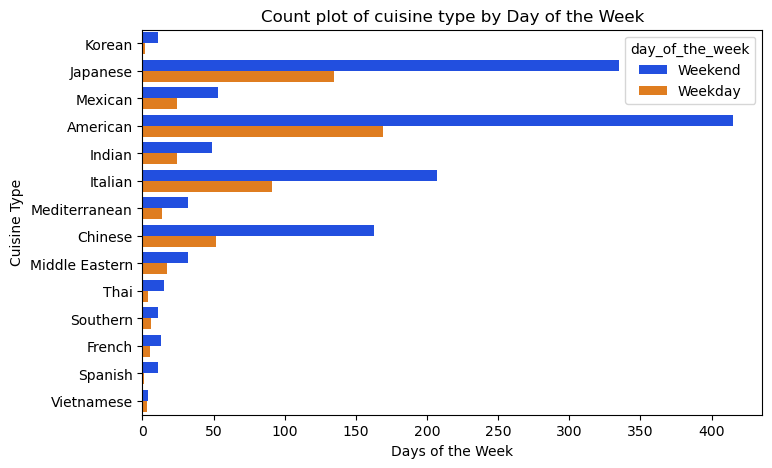

In [58]:
# Count plot of cuisine type by Day of the Week
plt.figure(figsize=(8, 5))
sns.countplot(data = foodhub_df, y='cuisine_type',hue= 'day_of_the_week', palette='bright')
plt.title('Count plot of cuisine type by Day of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Cuisine Type')
plt.show()

### Observation:

* The American cuisine type is the most popular on both weekends and weekdays. 
* There are more orders on weekends than weekdays for all the cuisine types.

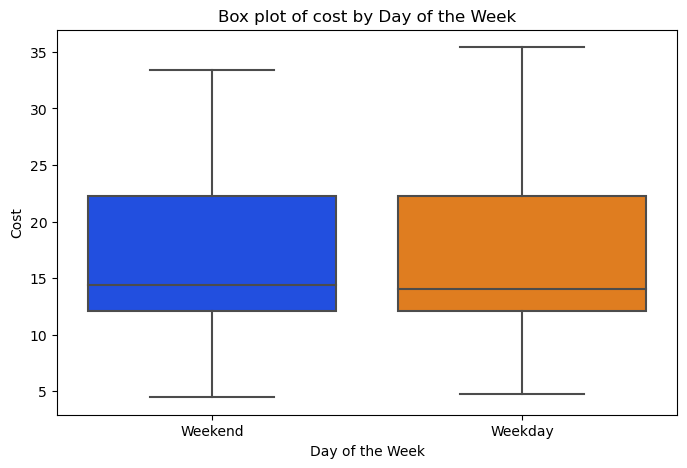

In [59]:
# Box plot of cost by Day of the Week
plt.figure(figsize=(8, 5))
sns.boxplot(data = foodhub_df, x='day_of_the_week',y='cost_of_the_order', palette='bright')
plt.title('Box plot of cost by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cost')
plt.show()

### Observation:
The cost of food are in the same range on both weekends and weekdays. Weekdays have the max cost. 

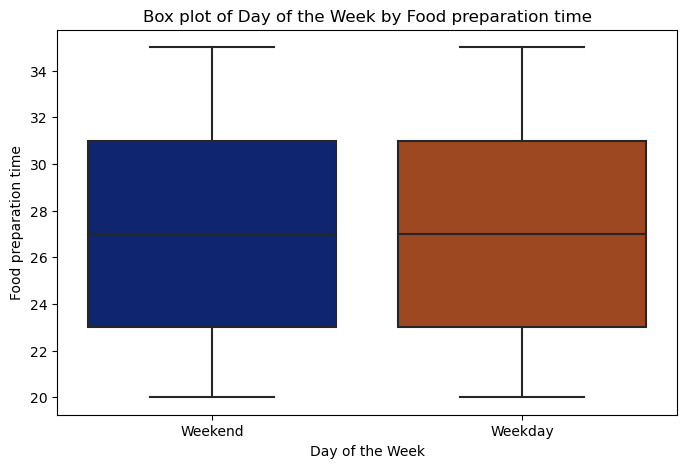

In [60]:
# Box plot of Day of the Week by Food preparation time
plt.figure(figsize=(8, 5))
sns.boxplot(data = foodhub_df, x='day_of_the_week',y='food_preparation_time', palette='dark')
plt.title('Box plot of Day of the Week by Food preparation time')
plt.xlabel('Day of the Week')
plt.ylabel('Food preparation time')
#plt.xticks(rotation=90)
plt.show()

### Observation:
The food preparion time is the same on all days of the week.

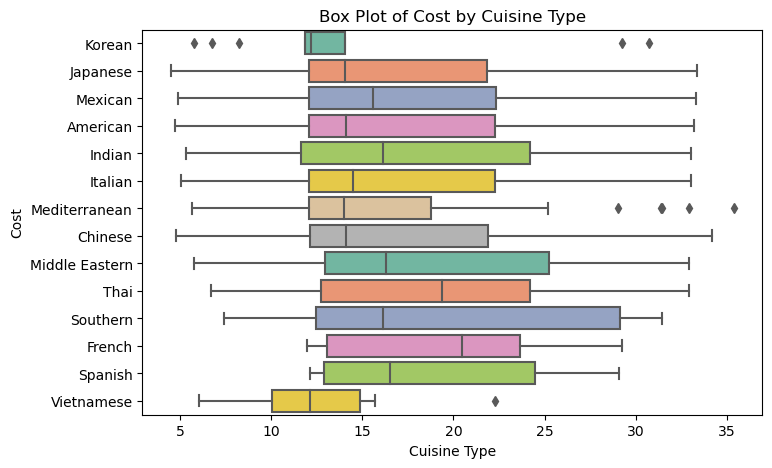

In [61]:
# Box plot of Cost by Cuisine Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='cost_of_the_order', y='cuisine_type', data = foodhub_df, palette = 'Set2')
plt.title('Box Plot of Cost by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost')
plt.show()

### Observation:
* Ouliers: The Korean, Meditteranean and Vietnamese Cuisines have outliers.
* Cost: The chinese cuisine type has the maximum cost.

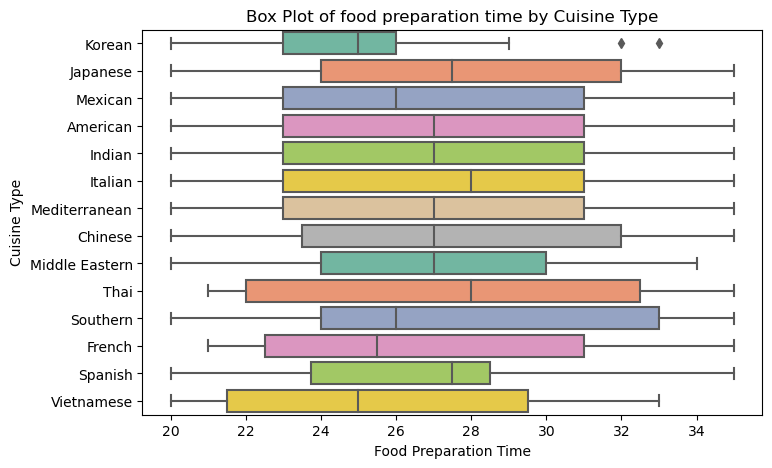

In [62]:
# Box plot of food preparation time by Cuisine Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='food_preparation_time', y='cuisine_type', data = foodhub_df, palette = 'Set2')
plt.title('Box Plot of food preparation time by Cuisine Type')
plt.xlabel('Food Preparation Time')
plt.ylabel('Cuisine Type')
plt.show()

### Obsevation:

* Outliers: The korean cuisine type has outliers.
* The Korean, Middle Eastern, Vietnamese have lower preparation time and the rest have a uniform minimum and maximum preparation time.

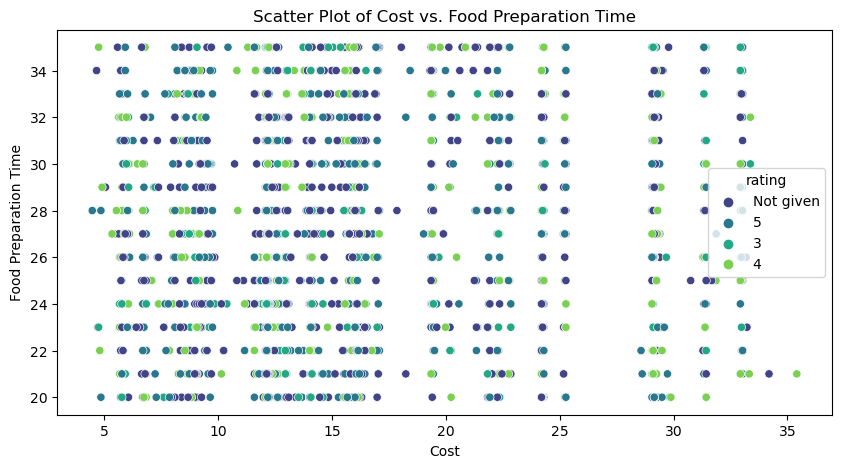

In [63]:
# Scatter plot of Cost vs. Food Preparation Time colored by Rating
plt.figure(figsize=(10, 5))
sns.scatterplot(x='cost_of_the_order', y='food_preparation_time', hue='rating', data = foodhub_df, palette = 'viridis')
plt.title('Scatter Plot of Cost vs. Food Preparation Time')
plt.xlabel('Cost')
plt.ylabel('Food Preparation Time')
plt.show()

### Observation:

* The Not given is concentrated at cost between 5 and 17 dollars.
* There are more oders between the cost of 5 and 17 dollars, this more ratings.

### **Question 9:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [35]:
# Filter out non-numeric ratings
numeric_ratings = foodhub_df[foodhub_df['rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())].copy()

# Convert rating column to numeric using .loc
numeric_ratings.loc[:, 'rating'] = pd.to_numeric(numeric_ratings['rating'])

# Group by restaurant name and calculate average rating and rating count
restaurant_stats = numeric_ratings.groupby('restaurant_name').agg(
    avg_rating=('rating', 'mean'), rating_count=('rating', 'count')
)

# Filter restaurants with rating count > 50 and average rating > 4
eligible_restaurants = restaurant_stats[
    (restaurant_stats['avg_rating'] > 4) & (restaurant_stats['rating_count'] > 50)
]

print("Restaurants fulfilling the criteria for promotional offer:")
print(eligible_restaurants)

Restaurants fulfilling the criteria for promotional offer:
                          avg_rating  rating_count
restaurant_name                                   
Blue Ribbon Fried Chicken   4.328125            64
Blue Ribbon Sushi           4.219178            73
Shake Shack                 4.278195           133
The Meatball Shop           4.511905            84


### **Question 10:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [36]:
# Filter orders greater than 20 and calculates the sum and revenue of the filtered column
order_gt_20 = foodhub_df[foodhub_df['cost_of_the_order'] > 20]['cost_of_the_order'].sum() * 0.25

# Filter orders greater than 5 and calculates the sum and revenue of the filtered column
order_gt_5 = foodhub_df[(foodhub_df['cost_of_the_order'] > 5) & (foodhub_df['cost_of_the_order'] <= 20)] ['cost_of_the_order'].sum() * 0.15

# Calculate total net revenue generated
total_revenue = order_gt_20 + order_gt_5
approximated_total_revenue = round(total_revenue)

print(f"The net revenue generated by the company across all orders is {total_revenue:.4f} dollars")


The net revenue generated by the company across all orders is 6166.3030 dollars


### **Question 11:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
#The total time required for each order (food preparation time + delivery time)
foodhub_df['total_time'] = foodhub_df['food_preparation_time'] + foodhub_df['delivery_time']

# The percentage of orders that take more than 60 minutes to get delivered
orders_over_60_mins = (foodhub_df['total_time'] > 60).sum()
total_orders = len(foodhub_df)
percentage_over_60_mins = (orders_over_60_mins / total_orders) * 100

print(f"The percentage of orders that take more than 60 minutes to get delivered: {percentage_over_60_mins:.4f}%")


### **Question 12:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Filter weekday and weekend data
# Without food preparation time
weekdays = foodhub_df[foodhub_df['day_of_the_week'] == 'Weekday']
weekends = foodhub_df[foodhub_df['day_of_the_week'] == 'Weekend']

# Calculate mean delivery time for weekdays and weekends
weekday_delivery_mean1 =  weekdays['delivery_time'].mean()
weekend_delivery_mean2 =  weekends['delivery_time'].mean()

print(f"The mean delivery for weekdays is {weekday_delivery_mean1:.4f}.")
print(f"The mean delivery for weekends is {weekend_delivery_mean2:.4f}.")

In [ ]:
# Group the data by day of the week and calculate the mean delivery time for each group
mean_delivery_time_by_day = foodhub_df.groupby('day_of_the_week')['delivery_time'].mean()

# Plot the mean delivery time for weekdays and weekends
plt.figure(figsize=(10, 6))
mean_delivery_time_by_day.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Mean Delivery Time on Weekdays vs. Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Delivery Time (minutes)')
plt.xticks(rotation = 0)
plt.show()

### Observation:

The mean delivery time for the weekdays is more than the mean delivery time on weekends. It takes a longer period to deliver on weekdays than on weekends.

## Conclusion and Recommendations

### **Question 13:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

### Conclusions:

Key observations and conclusions:

* Cuisine Type: American cuisine emerged as the top choice among customers, indicating a clear preference for American dishes over other cuisine types.

* Day of the Week: Orders surged during weekends compared to weekdays, with consistent popularity across cuisine types regardless of the day. However, the demand experienced a notable spike during weekends.

* Cost: The cost distribution exhibits two peaks, with a predominant peak around 13 dollars and a smaller peak at 25 dollars, suggesting a bimodal distribution in order expenditures.

* Rating: The majority of ratings cluster around the highest score of 5, indicating that it is likely primarily very satisfied customers who take the time to rate the service. However, the presence of many unrated orders raises the question of whether these unrated orders could potentially influence the overall rating in a different direction.

* Food Preparation Time and Delivery Time: Food preparation time shows a relatively consistent pattern, while delivery time varies significantly, suggesting that delivery time is the key factor affecting the total preparation time (the duration from order placement to delivery to the customer). Most orders are delivered within a timeframe of 25 to 30 minutes.

### Recommendations:

Based on the observations, we recommended:

* Since cuisines remain popular throughout the week, focus marketing efforts on weekdays to increase sales.

* To reduce total order time, evaluate ways to decrease delivery time. Investigate if longer delivery times on weekdays deter orders. Consider if weekday traffic contributes to longer delivery times.

* To encourage more customers to rate their experience, consider offering incentives or follow-up inquiries to understand why they choose not to rate. This will provide valuable feedback for improving services.

* For promotional offers, decide how to handle tie scores. Options include rewarding all customers or using other factors like spending amount to differentiate them.